In [39]:
%matplotlib inline

import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf
import math

In [40]:
df = pd.read_csv('data.csv')
df['timestamp'] = pd.to_datetime(df['timestamp'])
df.index = df.timestamp
del df['tot_rate']
del df['timestamp']
df.columns = ['level', 'rain']
df = df[10000:20000]


In [41]:
df.head()

,level,rain
timestamp,,
2008-04-14 04:00:00,0.369,0.0
2008-04-14 04:15:00,0.368,0.0
2008-04-14 04:30:00,0.368,0.0
2008-04-14 04:45:00,0.367,0.0
2008-04-14 05:00:00,0.366,0.0


In [42]:
# 100 equates to roughly 24 hours
n_features = 1000
y_train = df.rain[n_features:].values
y_train = np.reshape(y_train, (y_train.shape[0], 1)).astype('float32')

In [43]:
x_train = df[['level']].copy()
for i in range(1, n_features):
    x_train['level' + str(i)] = x_train['level'].shift(i)
x_train = x_train[n_features:].values.astype('float32')

In [45]:
x_train.shape

(9000, 1000)

In [46]:
# Add bias terms...
n_training_samples = x_train.shape[0]
x_train = np.reshape(np.c_[np.ones(n_training_samples),x_train],[n_training_samples,n_features + 1])

In [47]:
from sklearn import linear_model

In [48]:
reg = linear_model.LinearRegression()

In [49]:
reg.fit(x_train, y_train)

/Users/Conn/.pyenv/versions/democracy/lib/python2.7/site-packages/scipy/linalg/basic.py:884: RuntimeWarning: internal gelsd driver lwork query error, required iwork dimension not returned. This is likely the result of LAPACK bug 0038, fixed in LAPACK 3.2.2 (released July 21, 2010). Falling back to 'gelss' driver.
  warnings.warn(mesg, RuntimeWarning)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [50]:
print "Mean squared error: %.2f" % np.mean((reg.predict(x_train) - y_train) ** 2)

Mean squared error: 0.08


In [51]:
print 'Variance score: %.2f' % reg.score(x_train, y_train)


Variance score: 0.34


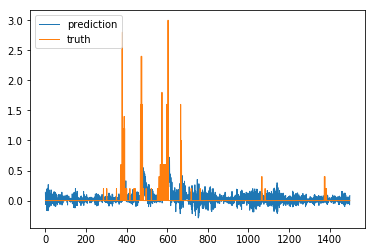

In [52]:
fig, ax = plt.subplots( nrows=1, ncols=1)  # create figure & 1 axis

#ax.plot(0.4 + df.rain.values[:1500]/10, linewidth=.5)

ax.plot(reg.predict(x_train)[:1500],  label='prediction', linewidth=1)
ax.plot(y_train[:1500],  label='truth', linewidth=1)
plt.legend()
plt.savefig('foo.png')
plt.legend(loc='upper left')